Importing necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Import the dataset from a csv file uploaded to GitHub

In [ ]:
body = pd.read_csv('https://raw.githubusercontent.com/CinderLeaf/CIS9660_Lab2/main/bodyfat.csv')

In [ ]:
body.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Create a correlation matrix to see the correlation between all features

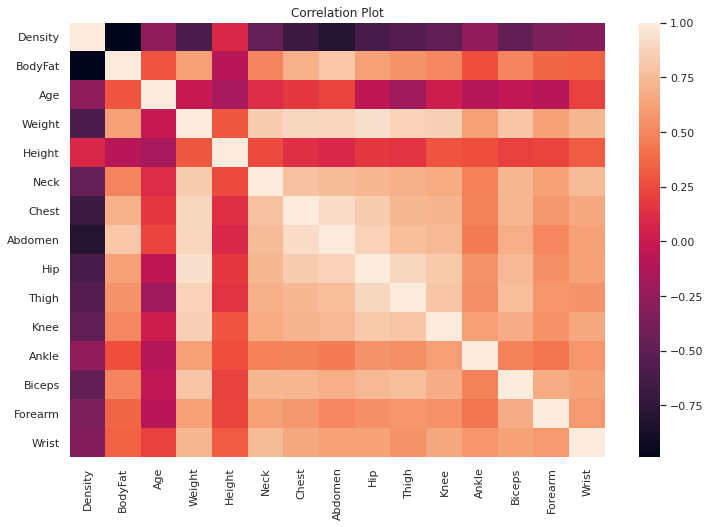

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})

sns.heatmap(body.corr())
plt.title("Correlation Plot")
plt.show()

We can see that density is have a negative correlation with almost all the other features, and this is because the formula that the creator of the dataset was using, which is the Siri's equation. 

There is a discussion on kaggle that "*This is because Body fat has been calculated using a formular involving Density. Hence it would be correct to leave this variable out of the model building process.*" Therefore, I will drop the density feature since I want to build a machine learning model to predict the body fat. 

Here is the link to that discussion: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset/discussion/303555?resource=download

Check the columns and shape of the dataframe before dropping the density column

In [ ]:
body.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [ ]:
body.shape

(252, 15)

In [ ]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Drop the density column

In [ ]:
body = body.drop(['Density'], axis = 1)
body.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Also check if there's any null values in the columns

In [ ]:
body.isnull().sum()

BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

Visualize the distribution of age in the dataset

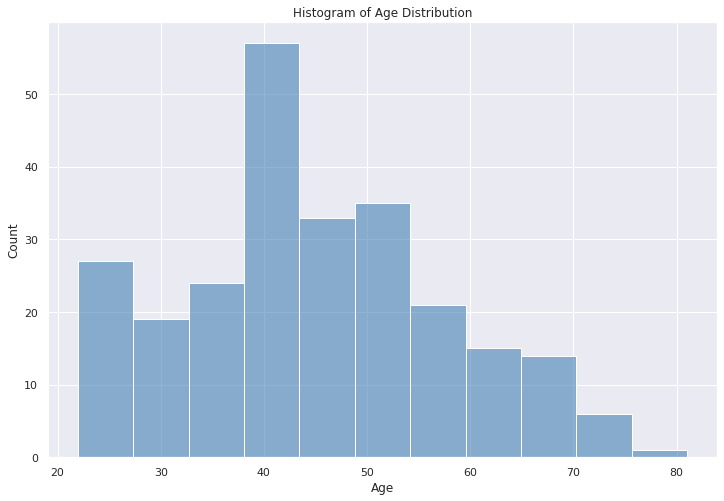

In [ ]:
sns.histplot(data = body['Age'], color = 'steelblue', alpha = 0.6)
plt.title("Histogram of Age Distribution")
plt.show()

Create combo chart to visualize the height and weight comparing to the age from the dataset.

Reference Link: https://towardsdatascience.com/creating-a-dual-axis-combo-chart-in-python-52624b187834

In [ ]:
#Calculate the average weight based on age group
avg_weight = body.groupby('Age', as_index=False)['Weight'].mean()

#Calculate the average height based on age group
avg_height = body.groupby('Age', as_index=False)['Height'].mean()

#Get all unique age
age = body['Age'].unique()
age.sort()

#Create a new dataframe for the combo chart to use
d = {'Age':age, 'Average_Weight':avg_weight['Weight'], 'Average_Height':avg_height['Height']}
df = pd.DataFrame(d)
df.head()

,Age,Average_Weight,Average_Height
0,22,163.625000,69.250000
1,23,175.100000,72.750000
2,24,189.750000,72.375000
3,25,179.312500,72.187500
4,26,194.833333,71.708333


For this visualization, somehow the line plot is not generating correctly, that it starts with age 44 as the first point instead of age 22. I checked the dataframe that I am using for this plot, looks like it is taking the Age as the index, that age 44 is located at index 22. I haven't figure out how to fix this problem yet, but I will definitely go back to this visualization later on if I find any solutions.

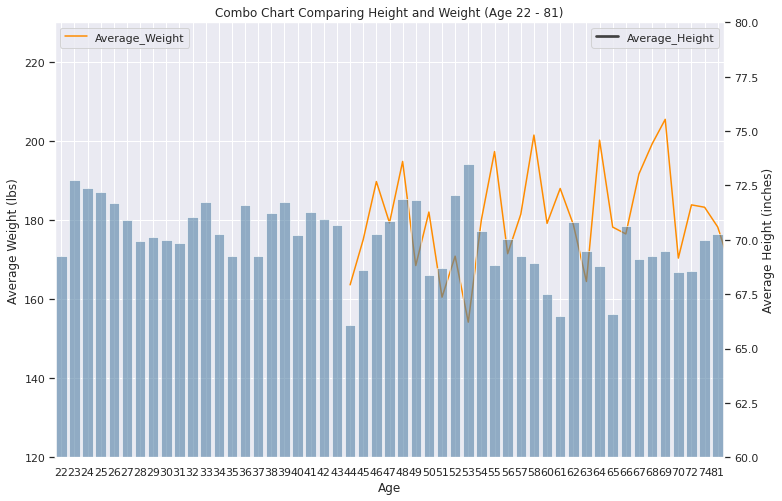

In [ ]:
ax1 = sns.lineplot(
    x = 'Age',
    y = 'Average_Weight',
    data = df,
    sort = False,
    color = 'darkorange'
)
ax1.set_ylabel('Average Weight (lbs)')
ax1.set_ylim(120,230)
ax1.legend(['Average_Weight'], loc = 'upper left')

ax2 = ax1.twinx()

sns.barplot(
    x = 'Age',
    y = 'Average_Height',
    data = df,
    color = 'steelblue',
    alpha = 0.6,
    ax = ax2
)

ax2.grid(b = False)
ax2.set_ylabel('Average Height (inches)')
ax2.set_ylim(60, 80)
ax2.legend(['Average_Height'], loc = 'upper right')

plt.title('Combo Chart Comparing Height and Weight (Age 22 - 81)')
plt.show()

Create scatterplot to better picture the correlation between abdomen and body fat since they have a strong positive correlation based on the correlation matrix.



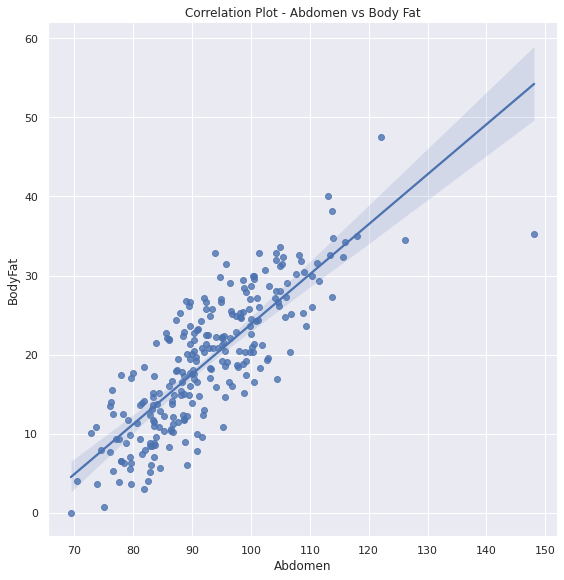

In [ ]:
sns.lmplot(x = 'Abdomen', y = 'BodyFat', data = body, height = 8).set(title='Correlation Plot - Abdomen vs Body Fat')
plt.show()

Create scatterplot to picture the correlation between body fat and height, because based on the correlation matrix, these two are having a weak, negative correlation

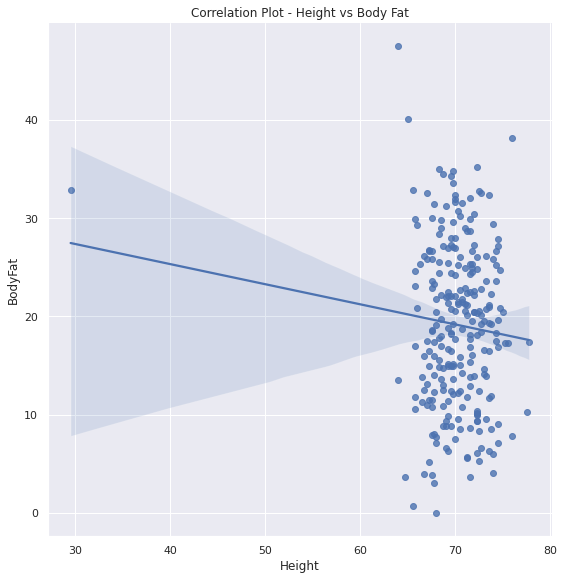

In [ ]:
sns.lmplot(x = 'Height', y = 'BodyFat', data = body, height = 8).set(title='Correlation Plot - Height vs Body Fat')
plt.show()

Separate the data into features(X) and targets(Y)

The Height will not be included in the feature set since it shows a weak correlation.

BodyFat is what we are trying to estimate (y).



In [ ]:
#Splitting the dataset into features and targets
X = body.drop(['BodyFat', 'Height'], axis = 1).values
y = body['BodyFat'].values

Take a look at the feature set

In [ ]:
print(X)

[[ 23.   154.25  36.2  ...  32.    27.4   17.1 ]
 [ 22.   173.25  38.5  ...  30.5   28.9   18.2 ]
 [ 22.   154.    34.   ...  28.8   25.2   16.6 ]
 ...
 [ 72.   186.75  38.9  ...  31.3   27.2   18.  ]
 [ 72.   190.75  38.9  ...  30.5   29.4   19.8 ]
 [ 74.   207.5   40.8  ...  33.7   30.    20.9 ]]


Take a look at the target

In [ ]:
print(y)

[12.3  6.1 25.3 10.4 28.7 20.9 19.2 12.4  4.1 11.7  7.1  7.8 20.8 21.2
 22.1 20.9 29.  22.9 16.  16.5 19.1 15.2 15.6 17.7 14.   3.7  7.9 22.9
  3.7  8.8 11.9  5.7 11.8 21.3 32.3 40.1 24.2 28.4 35.2 32.6 34.5 32.9
 31.6 32.   7.7 13.9 10.8  5.6 13.6  4.  10.2  6.6  8.   6.3  3.9 22.6
 20.4 28.  31.5 24.6 26.1 29.8 30.7 25.8 32.3 30.  21.5 13.8  6.3 12.9
 24.3  8.8  8.5 13.5 11.8 18.5  8.8 22.2 21.5 18.8 31.4 26.8 18.4 27.
 27.  26.6 14.9 23.1  8.3 14.1 20.5 18.2  8.5 24.9  9.  17.4  9.6 11.3
 17.8 22.2 21.2 20.4 20.1 22.3 25.4 18.  19.3 18.3 17.3 21.4 19.7 28.
 22.1 21.3 26.7 16.7 20.1 13.9 25.8 18.1 27.9 25.3 14.7 16.  13.8 17.5
 27.2 17.4 20.8 14.9 18.1 22.7 23.6 26.1 24.4 27.1 21.8 29.4 22.4 20.4
 24.9 18.3 23.3  9.4 10.3 14.2 19.2 29.6  5.3 25.2  9.4 19.6 10.1 16.5
 21.  17.3 31.2 10.  12.5 22.5  9.4 14.6 13.  15.1 27.3 19.2 21.8 20.3
 34.3 16.5  3.   0.7 20.5 16.9 25.3  9.9 13.1 29.9 22.5 16.9 26.6  0.
 11.5 12.1 17.5  8.6 23.6 20.4 20.5 24.4 11.4 38.1 15.9 24.7 22.8 25.5
 22.  17.

In [ ]:
y_range = y.max() - y.min()
y_range

47.5

Splitting the dataset into training and test sets in the ratio 70/30

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Creating the model and fitting (training) on the training data

In [ ]:
from sklearn.linear_model import LinearRegression

#Loading the Linear Regression Model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

Making Predictions on the test data

In [ ]:
y_pred = LR.predict(X_test)

Calculating the coefficients

In [ ]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [ 0.42457858 -5.02205886 -0.60373316  0.39403891 11.46070965 -2.01778201
  1.04760834  0.50950588  0.45131131  0.89498119  0.69568447 -1.31428306]


Calculating the intercept

In [ ]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: 19.56534090909092


Calculating R-Squared

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.7383216916886485


Calculating Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 17.26492725016094


Calculating Root Mean Squared Error

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 4.1551085726080546


Calculating Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 3.4547706062182626
